In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


In [2]:
data_path = 'data/processed/combined_labeled_standardized.csv'
df = pd.read_csv(data_path)

Decision Tree - Mean Accuracy: 0.9780, Std: 0.0204
Random Forest - Mean Accuracy: 0.9940, Std: 0.0080
SVM - Mean Accuracy: 0.9800, Std: 0.0167
KNN - Mean Accuracy: 0.9880, Std: 0.0147
Gradient Boosting - Mean Accuracy: 0.9760, Std: 0.0273
Neural Network - Mean Accuracy: 0.9920, Std: 0.0117


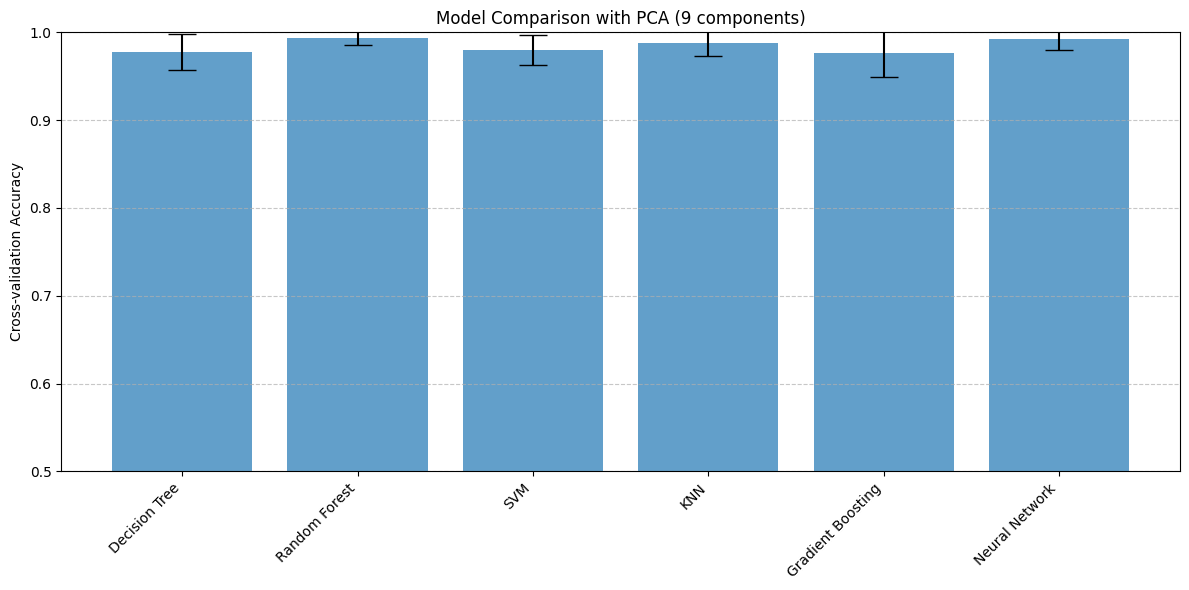

In [3]:
# Define features and target
X = df.drop(['patient_id', 'healthy'], axis=1)
y = df['healthy']

# Fill NaN values with 0 (or you can use other imputation methods)
X = X.fillna(0)
conponents = 9;
# Create a pipeline with PCA and various classifiers
models = {
    'Decision Tree': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=conponents)),
        ('classifier', DecisionTreeClassifier())
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=conponents)),
        ('classifier', RandomForestClassifier())
    ]),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=conponents)),
        ('classifier', SVC(probability=True))
    ]),
    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=conponents)),
        ('classifier', KNeighborsClassifier())
    ]),
    'Gradient Boosting': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=conponents)),
        ('classifier', GradientBoostingClassifier())
    ]),
    'Neural Network': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=conponents)),
        ('classifier', MLPClassifier(max_iter=1000))
    ])
}

# Evaluate each model with cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    results[name] = {
        'mean_accuracy': scores.mean(),
        'std_accuracy': scores.std()
    }
    print(f"{name} - Mean Accuracy: {scores.mean():.4f}, Std: {scores.std():.4f}")

# Create a comparison plot
plt.figure(figsize=(12, 6))
model_names = list(results.keys())
accuracies = [results[name]['mean_accuracy'] for name in model_names]
std_devs = [results[name]['std_accuracy'] for name in model_names]

plt.bar(model_names, accuracies, yerr=std_devs, capsize=10, alpha=0.7)
plt.title(f'Model Comparison with PCA ({conponents} components)')
plt.ylabel('Cross-validation Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.5, 1.0)  # Adjust as needed
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

Random Forest Metrics:
Accuracy: 0.9900
F1 Score: 0.9895
Precision: 0.9792
Recall: 1.0000


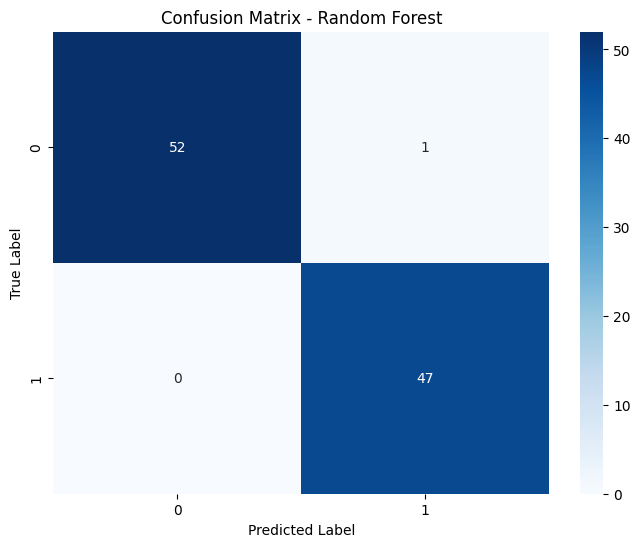


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.98      1.00      0.99        47

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get the Random Forest model
rf_model = models['Random Forest']

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print metrics
print(f"Random Forest Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Top 9 most important features:
             Feature  Importance
0  ENSG00000212584.1    0.008547
1  ENSG00000206864.1    0.008547
2  ENSG00000227067.3    0.008547
3  ENSG00000215000.4    0.008528
4  ENSG00000201443.1    0.008528
5  ENSG00000230788.2    0.008508
6  ENSG00000202407.1    0.008508
7  ENSG00000237957.6    0.008451
8  ENSG00000199705.1    0.008451


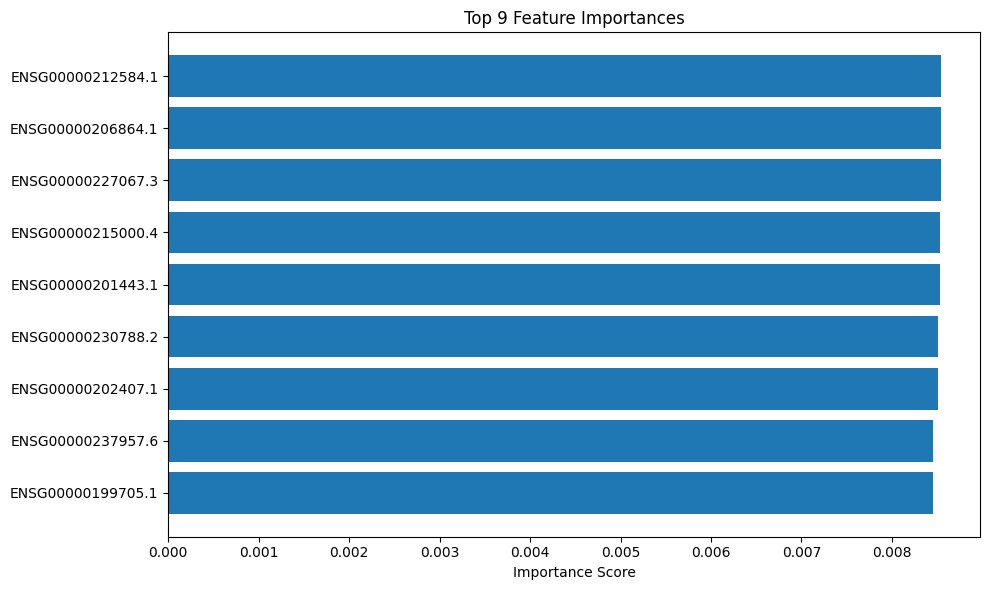

In [6]:
# Get the Random Forest model
rf_model = models['Random Forest']

# Fit the model to get feature importances
rf_model.fit(X, y)

# Get the PCA step and the classifier from the pipeline
pca = rf_model.named_steps['pca']
rf_classifier = rf_model.named_steps['classifier']

# Get feature importances for PCA components
component_importances = rf_classifier.feature_importances_

# Get the PCA components (loadings)
components = pca.components_

# Calculate feature importances in the original feature space
# This maps component importances back to original features
feature_importances = np.abs(components.T.dot(component_importances))

# Create a DataFrame of feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)

# Display top 5 features
top_5_features = importance_df.head(9)
print("Top 9 most important features:")
print(top_5_features)

# Plot top 5 features
plt.figure(figsize=(10, 6))
plt.barh(top_5_features['Feature'], top_5_features['Importance'])
plt.xlabel('Importance Score')
plt.title('Top 9 Feature Importances')
plt.gca().invert_yaxis()  # To display highest importance at the top
plt.tight_layout()